<a href="https://colab.research.google.com/github/RiccardoFrancabandiera/Progetto-BI/blob/main/Business_Intelligence_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Intelligence

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import dei pacchetti necessari

In [3]:
%%capture

import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Import del dataset di training

In [4]:
# Import dataset
diabetes_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_train.csv', na_values= ' ?')

display(diabetes_train)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes
0,Male,64.822537,0,0,never,27.097915,6.517746,157.338059,1.220942,4262.942153,38.820127,1
1,Male,59.912290,1,0,never,33.206670,7.971341,148.625701,0.807652,4932.729931,40.381336,1
2,Male,67.853267,0,0,former,30.639790,8.919297,240.733664,1.225950,7372.749574,55.789060,1
3,Male,57.985607,0,0,never,32.609541,8.759698,154.640163,1.432736,5039.552869,40.877685,1
4,Male,70.278133,0,0,current,37.703827,6.261874,169.415511,0.684205,6267.482417,53.671280,1
...,...,...,...,...,...,...,...,...,...,...,...,...
583,Female,19.354174,0,0,former,28.670601,5.248329,160.905601,0.959618,4808.000000,52.632201,0
584,Female,70.000000,0,0,not current,24.750000,3.500000,159.000000,-1.084071,3935.250000,43.652306,0
585,Male,60.000000,0,1,current,29.050000,5.800000,145.000000,-0.468180,4212.250000,58.503956,0
586,Female,27.000000,0,0,No Info,27.320000,6.000000,200.000000,NaN,5464.000000,60.704415,0


Vedo quali features presentano dati nulli

In [5]:
# Count the number of missing values for each column
diabetes_train.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
Insulin_Sensitivity_Est,111
BMI_Glucose_Interaction,0


In [6]:
print(diabetes_train.size, "\n",  diabetes_train.shape, "\n", diabetes_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   588 non-null    object 
 1   age                      588 non-null    float64
 2   hypertension             588 non-null    int64  
 3   heart_disease            588 non-null    int64  
 4   smoking_history          588 non-null    object 
 5   bmi                      588 non-null    float64
 6   HbA1c_level              588 non-null    float64
 7   blood_glucose_level      588 non-null    float64
 8   Insulin_Sensitivity_Est  477 non-null    float64
 9   BMI_Glucose_Interaction  588 non-null    float64
 10  Random_Lab_Marker        588 non-null    float64
 11  diabetes                 588 non-null    int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 55.3+ KB
7056 
 (588, 12) 
 None


# Peprocessing

Trasforming the attribute "age" to integer

In [7]:
diabetes_train['age'] = diabetes_train['age'].astype(int)

display(diabetes_train)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes
0,Male,64,0,0,never,27.097915,6.517746,157.338059,1.220942,4262.942153,38.820127,1
1,Male,59,1,0,never,33.206670,7.971341,148.625701,0.807652,4932.729931,40.381336,1
2,Male,67,0,0,former,30.639790,8.919297,240.733664,1.225950,7372.749574,55.789060,1
3,Male,57,0,0,never,32.609541,8.759698,154.640163,1.432736,5039.552869,40.877685,1
4,Male,70,0,0,current,37.703827,6.261874,169.415511,0.684205,6267.482417,53.671280,1
...,...,...,...,...,...,...,...,...,...,...,...,...
583,Female,19,0,0,former,28.670601,5.248329,160.905601,0.959618,4808.000000,52.632201,0
584,Female,70,0,0,not current,24.750000,3.500000,159.000000,-1.084071,3935.250000,43.652306,0
585,Male,60,0,1,current,29.050000,5.800000,145.000000,-0.468180,4212.250000,58.503956,0
586,Female,27,0,0,No Info,27.320000,6.000000,200.000000,NaN,5464.000000,60.704415,0


Changing the value "no info" of the feature "smoking_history" into 'current' (thinking about worst case scenario).

In [8]:
diabetes_train['smoking_history'] = diabetes_train['smoking_history'].replace('No Info', 'current')


display(diabetes_train)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes
0,Male,64,0,0,never,27.097915,6.517746,157.338059,1.220942,4262.942153,38.820127,1
1,Male,59,1,0,never,33.206670,7.971341,148.625701,0.807652,4932.729931,40.381336,1
2,Male,67,0,0,former,30.639790,8.919297,240.733664,1.225950,7372.749574,55.789060,1
3,Male,57,0,0,never,32.609541,8.759698,154.640163,1.432736,5039.552869,40.877685,1
4,Male,70,0,0,current,37.703827,6.261874,169.415511,0.684205,6267.482417,53.671280,1
...,...,...,...,...,...,...,...,...,...,...,...,...
583,Female,19,0,0,former,28.670601,5.248329,160.905601,0.959618,4808.000000,52.632201,0
584,Female,70,0,0,not current,24.750000,3.500000,159.000000,-1.084071,3935.250000,43.652306,0
585,Male,60,0,1,current,29.050000,5.800000,145.000000,-0.468180,4212.250000,58.503956,0
586,Female,27,0,0,current,27.320000,6.000000,200.000000,NaN,5464.000000,60.704415,0


Valori nulli nella feature "Insulin_Sensitivity_Est" da trattare in modo diverso (da aspettare analisi di Tamara)

In [9]:
# Replace NaN values with the most frequent value for non-numerical columns
# Fill NaNs in numerical columns with mean (or median)
for col in diabetes_train.select_dtypes(include=np.number).columns:
    mean_val = diabetes_train[col].mean()
    diabetes_train[col].fillna(mean_val, inplace=True)

display(diabetes_train)

<ipython-input-9-21406117d634>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_train[col].fillna(mean_val, inplace=True)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes
0,Male,64,0,0,never,27.097915,6.517746,157.338059,1.220942,4262.942153,38.820127,1
1,Male,59,1,0,never,33.206670,7.971341,148.625701,0.807652,4932.729931,40.381336,1
2,Male,67,0,0,former,30.639790,8.919297,240.733664,1.225950,7372.749574,55.789060,1
3,Male,57,0,0,never,32.609541,8.759698,154.640163,1.432736,5039.552869,40.877685,1
4,Male,70,0,0,current,37.703827,6.261874,169.415511,0.684205,6267.482417,53.671280,1
...,...,...,...,...,...,...,...,...,...,...,...,...
583,Female,19,0,0,former,28.670601,5.248329,160.905601,0.959618,4808.000000,52.632201,0
584,Female,70,0,0,not current,24.750000,3.500000,159.000000,-1.084071,3935.250000,43.652306,0
585,Male,60,0,1,current,29.050000,5.800000,145.000000,-0.468180,4212.250000,58.503956,0
586,Female,27,0,0,current,27.320000,6.000000,200.000000,0.802415,5464.000000,60.704415,0


In [10]:
print(diabetes_train.isna().sum())

gender                     0
age                        0
hypertension               0
heart_disease              0
smoking_history            0
bmi                        0
HbA1c_level                0
blood_glucose_level        0
Insulin_Sensitivity_Est    0
BMI_Glucose_Interaction    0
Random_Lab_Marker          0
diabetes                   0
dtype: int64


In [11]:
diabetes_train['diabetes'].value_counts()

,count
diabetes,
0,441
1,147


In [12]:
diabetes_train.describe

<bound method NDFrame.describe of      gender  age  hypertension  heart_disease smoking_history        bmi  \
0      Male   64             0              0           never  27.097915   
1      Male   59             1              0           never  33.206670   
2      Male   67             0              0          former  30.639790   
3      Male   57             0              0           never  32.609541   
4      Male   70             0              0         current  37.703827   
..      ...  ...           ...            ...             ...        ...   
583  Female   19             0              0          former  28.670601   
584  Female   70             0              0     not current  24.750000   
585    Male   60             0              1         current  29.050000   
586  Female   27             0              0         current  27.320000   
587    Male   80             0              0            ever  17.350000   

     HbA1c_level  blood_glucose_level  Insulin_Sensitivity_Est  \
0       6.517746           157.338059                 1.220942   
1       7.971341           148.625701                 0.807652   
2       8.919297           240.733664                 1.225950   
3       8.759698           154.640163                 1.432736   
4       6.261874           169.415511                 0.684205   
..           ...                  ...                      ...   
583     5.248329           160.905601                 0.959618   
584     3.500000           159.000000                -1.084071   
585     5.800000           145.000000                -0.468180   
586     6.000000           200.000000                 0.802415   
587     3.500000           130.000000                -0.596994   

     BMI_Glucose_Interaction  Random_Lab_Marker  diabetes  
0                4262.942153          38.820127         1  
1                4932.729931          40.381336         1  
2                7372.749574          55.789060         1  
3                5039.552869          40.877685         1  
4                6267.482417          53.671280         1  
..                       ...                ...       ...  
583              4808.000000          52.632201         0  
584              3935.250000          43.652306         0  
585              4212.250000          58.503956         0  
586              5464.000000          60.704415         0  
587              2255.500000          35.951112         0  

[588 rows x 12 columns]>

Encoding delle features "gender" e "smoking_history"

In [13]:
# Encoding

# Label Encoding
labelenc_class = LabelEncoder()
labelenc_class.fit(diabetes_train['gender'].values)
diabetes_train['gender'] = labelenc_class.transform(diabetes_train['gender'].values)


# One-hot encoding

diabetes_train = pd.get_dummies(diabetes_train, columns = ['smoking_history'])
columns = ['smoking_history_current',	'smoking_history_ever',	'smoking_history_former', 'smoking_history_never' ,'smoking_history_not current']
diabetes_train[columns] = diabetes_train[columns].astype(int)

display(diabetes_train)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1,64,0,0,27.097915,6.517746,157.338059,1.220942,4262.942153,38.820127,1,0,0,0,1,0
1,1,59,1,0,33.206670,7.971341,148.625701,0.807652,4932.729931,40.381336,1,0,0,0,1,0
2,1,67,0,0,30.639790,8.919297,240.733664,1.225950,7372.749574,55.789060,1,0,0,1,0,0
3,1,57,0,0,32.609541,8.759698,154.640163,1.432736,5039.552869,40.877685,1,0,0,0,1,0
4,1,70,0,0,37.703827,6.261874,169.415511,0.684205,6267.482417,53.671280,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,0,19,0,0,28.670601,5.248329,160.905601,0.959618,4808.000000,52.632201,0,0,0,1,0,0
584,0,70,0,0,24.750000,3.500000,159.000000,-1.084071,3935.250000,43.652306,0,0,0,0,0,1
585,1,60,0,1,29.050000,5.800000,145.000000,-0.468180,4212.250000,58.503956,0,1,0,0,0,0
586,0,27,0,0,27.320000,6.000000,200.000000,0.802415,5464.000000,60.704415,0,1,0,0,0,0


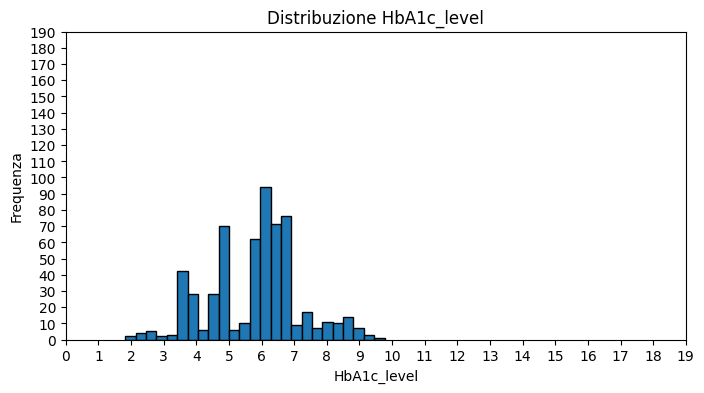

In [14]:

plt.figure(figsize=(8, 4))
plt.hist(diabetes_train['HbA1c_level'], bins=25, edgecolor='black')
plt.title('Distribuzione HbA1c_level')
plt.xlabel('HbA1c_level')
plt.ylabel('Frequenza')
plt.xticks(ticks=np.arange(0,20,1), labels=[f'{i}' for i in range(0,20,1)])
plt.yticks(ticks=np.arange(0,200,10), labels=[f'{i}' for i in range(0,200,10)])
plt.grid(False)
plt.show()


In [15]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

diabetes_train['age'] = scaler.fit_transform(diabetes_train['age'].values.reshape(-1, 1))
diabetes_train['bmi'] = scaler.fit_transform(diabetes_train['bmi'].values.reshape(-1, 1))
diabetes_train['HbA1c_level'] = scaler.fit_transform(diabetes_train['HbA1c_level'].values.reshape(-1, 1))
diabetes_train['blood_glucose_level'] = scaler.fit_transform(diabetes_train['blood_glucose_level'].values.reshape(-1, 1))
diabetes_train['Random_Lab_Marker'] = scaler.fit_transform(diabetes_train['Random_Lab_Marker'].values.reshape(-1, 1))

display(diabetes_train)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1,0.8000,0,0,0.161773,0.590557,0.363743,1.220942,4262.942153,0.364301,1,0,0,0,1,0
1,1,0.7375,1,0,0.236425,0.773548,0.324886,0.807652,4932.729931,0.394142,1,0,0,0,1,0
2,1,0.8375,0,0,0.205057,0.892885,0.735678,1.225950,7372.749574,0.688649,1,0,0,1,0,0
3,1,0.7125,0,0,0.229128,0.872793,0.351710,1.432736,5039.552869,0.403630,1,0,0,0,1,0
4,1,0.8750,0,0,0.291382,0.558346,0.417607,0.684205,6267.482417,0.648169,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,0,0.2375,0,0,0.180992,0.430752,0.379654,0.959618,4808.000000,0.628308,0,0,0,1,0,0
584,0,0.8750,0,0,0.133081,0.210658,0.371155,-1.084071,3935.250000,0.456664,0,0,0,0,0,1
585,1,0.7500,0,1,0.185629,0.500201,0.308716,-0.468180,4212.250000,0.740542,0,1,0,0,0,0
586,0,0.3375,0,0,0.164487,0.525379,0.554010,0.802415,5464.000000,0.782602,0,1,0,0,0,0


Removing BMI_Glucose_Interaction

In [16]:
del diabetes_train['BMI_Glucose_Interaction']

display(diabetes_train)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,Random_Lab_Marker,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1,0.8000,0,0,0.161773,0.590557,0.363743,1.220942,0.364301,1,0,0,0,1,0
1,1,0.7375,1,0,0.236425,0.773548,0.324886,0.807652,0.394142,1,0,0,0,1,0
2,1,0.8375,0,0,0.205057,0.892885,0.735678,1.225950,0.688649,1,0,0,1,0,0
3,1,0.7125,0,0,0.229128,0.872793,0.351710,1.432736,0.403630,1,0,0,0,1,0
4,1,0.8750,0,0,0.291382,0.558346,0.417607,0.684205,0.648169,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,0,0.2375,0,0,0.180992,0.430752,0.379654,0.959618,0.628308,0,0,0,1,0,0
584,0,0.8750,0,0,0.133081,0.210658,0.371155,-1.084071,0.456664,0,0,0,0,0,1
585,1,0.7500,0,1,0.185629,0.500201,0.308716,-0.468180,0.740542,0,1,0,0,0,0
586,0,0.3375,0,0,0.164487,0.525379,0.554010,0.802415,0.782602,0,1,0,0,0,0


In [17]:
diabetes_train.iloc[:, :-1].corr()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,Random_Lab_Marker,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never
gender,1.000000,0.035402,-0.038990,0.093186,-0.062657,0.224807,0.091925,0.078657,0.053820,0.253329,0.155320,0.008996,0.043052,-0.159350
age,0.035402,1.000000,0.203213,0.166497,0.277611,0.209100,0.250991,0.055803,-0.092326,0.417290,-0.297182,0.026691,0.137389,0.139946
hypertension,-0.038990,0.203213,1.000000,0.050150,0.235991,0.145559,0.054696,-0.097201,-0.104143,0.124320,-0.135252,0.018395,-0.042940,0.184314
heart_disease,0.093186,0.166497,0.050150,1.000000,-0.007833,-0.081824,-0.069721,0.036636,0.078138,-0.065003,0.028403,0.071828,0.033890,-0.078799
bmi,-0.062657,0.277611,0.235991,-0.007833,1.000000,0.129822,0.223251,-0.135558,-0.028043,0.374578,-0.158990,-0.040987,0.008244,0.194703
HbA1c_level,0.224807,0.209100,0.145559,-0.081824,0.129822,1.000000,0.402934,0.089535,-0.036068,0.547834,-0.064192,-0.107197,0.115812,0.030621
blood_glucose_level,0.091925,0.250991,0.054696,-0.069721,0.223251,0.402934,1.000000,-0.041427,-0.094993,0.586455,-0.225650,-0.050263,0.253077,0.066552
Insulin_Sensitivity_Est,0.078657,0.055803,-0.097201,0.036636,-0.135558,0.089535,-0.041427,1.000000,0.070337,-0.029780,-0.014202,-0.119835,0.107138,-0.041835
Random_Lab_Marker,0.053820,-0.092326,-0.104143,0.078138,-0.028043,-0.036068,-0.094993,0.070337,1.000000,-0.118891,0.139091,-0.094061,-0.108043,0.008945
diabetes,0.253329,0.417290,0.124320,-0.065003,0.374578,0.547834,0.586455,-0.029780,-0.118891,1.000000,-0.162864,-0.105502,0.088319,0.168767


In [18]:
# Dividing data in features and labels

X_train = diabetes_train.iloc[:, :-1].values
y_train = diabetes_train['diabetes'].values


Preprocessing Test set

In [19]:
diabetes_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_test.csv')



diabetes_test['age'] = diabetes_test['age'].astype(int)


diabetes_test['smoking_history'] = diabetes_test['smoking_history'].replace('No Info', 'current')


for col in diabetes_test.select_dtypes(include=np.number).columns:
    mean_val = diabetes_test[col].mean()
    diabetes_test[col].fillna(mean_val, inplace=True)


labelenc_class = LabelEncoder()
labelenc_class.fit(diabetes_test['gender'].values)
diabetes_test['gender'] = labelenc_class.transform(diabetes_test['gender'].values)


diabetes_test = pd.get_dummies(diabetes_test, columns = ['smoking_history'])
columns = ['smoking_history_current',	'smoking_history_ever',	'smoking_history_former', 'smoking_history_never' ,'smoking_history_not current']
diabetes_test[columns] = diabetes_test[columns].astype(int)


diabetes_test['age'] = scaler.fit_transform(diabetes_test['age'].values.reshape(-1, 1))
diabetes_test['bmi'] = scaler.fit_transform(diabetes_test['bmi'].values.reshape(-1, 1))
diabetes_test['HbA1c_level'] = scaler.fit_transform(diabetes_test['HbA1c_level'].values.reshape(-1, 1))
diabetes_test['blood_glucose_level'] = scaler.fit_transform(diabetes_test['blood_glucose_level'].values.reshape(-1, 1))
diabetes_test['Random_Lab_Marker'] = scaler.fit_transform(diabetes_test['Random_Lab_Marker'].values.reshape(-1, 1))

del diabetes_test['BMI_Glucose_Interaction']

X_test = diabetes_test.iloc[:, :-1].values
y_test = diabetes_test['diabetes'].values

display(diabetes_test)

<ipython-input-19-aa83490500c3>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_test[col].fillna(mean_val, inplace=True)


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,Random_Lab_Marker,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1,0.913580,0,0,0.390655,0.966138,1.000000,1.874574,0.569570,1,0,0,1,0,0
1,0,0.679012,0,0,0.578436,0.128765,0.242085,0.264573,0.817273,1,0,0,0,1,0
2,1,0.888889,0,0,0.391082,0.959601,0.994566,1.927612,0.566342,1,1,0,0,0,0
3,1,0.802469,0,0,0.386001,0.547567,0.361670,1.388626,0.368396,1,0,0,0,1,0
4,0,0.679012,0,0,0.755864,0.505424,1.000000,0.601001,0.635142,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0,0.617284,0,0,0.378072,0.273435,0.227273,0.819003,0.213883,0,0,0,0,1,0
144,0,0.679012,0,0,0.390655,0.401038,0.090909,0.439735,0.703095,0,0,0,0,1,0
145,0,0.469136,0,0,0.390655,0.273435,0.272727,1.346416,0.420437,0,1,0,0,0,0
146,0,0.160494,0,0,0.389121,0.110855,0.363471,-0.630595,0.839962,0,1,0,0,0,0


Random Forest


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


random_forest = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=42)


random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Output dei risultati
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)


df_rf = pd.DataFrame({
    'acc.': [
        np.round(random_forest.score(X_train, y_train) * 100, decimals=2),
        np.round(random_forest.score(X_test, y_test) * 100, decimals=2)
    ]
}, index=['training', 'test'])

# Visualizzazione
display(df_rf)


Accuracy:  1.0
Precision:  1.0
Recall:  1.0


,acc.
training,100.0
test,100.0


In [21]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

# Nuovo modello per cross-validation (con gli stessi parametri)
rf_cv = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=42)

# Predizione con validazione incrociata
y_pred_cv = cross_val_predict(rf_cv, X_train, y_train, cv=5)

# Valutazione
accuracy_cv = accuracy_score(y_train, y_pred_cv)
conf_matrix_cv = confusion_matrix(y_train, y_pred_cv)
conf_df_cv = pd.DataFrame(conf_matrix_cv, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

# Output
print("Cross-validated Accuracy:", accuracy_cv)
print("Confusion Matrix:\n", conf_df_cv)



Cross-validated Accuracy: 1.0
Confusion Matrix:
           Predicted 0  Predicted 1
Actual 0          441            0
Actual 1            0          147


In [22]:
from sklearn.model_selection import GridSearchCV

# Definizione della griglia di parametri
param_grid = {
    "n_estimators": [100, 250, 500],
    "max_depth": [None, 10, 20, 30]
}

# GridSearch con 5-fold cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Output dei migliori parametri
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best Cross-Validation Score: 1.0
